# Example 1

**Content**

This notebook reproduces the first example of the paper. It consists of four main subheadings;

- Importing the *hcpinnseikonal* package functions
- Define the arguments for the input parameters
- Setup the medium and compute the data
- Training and inference

**Saving directory**

The notebook utilized [*wandb*](https://wandb.ai) for keeping track of the parameters and experiments. You can uncomment the *wandb* call to turn this feature off. Accordingly you need to specify the folder to save your experiment by changing the related *wandb* line inside the main function below.

## Import *hcpinnseikonal* package functions

In [1]:
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from argparse import ArgumentParser   
from scipy import interpolate

from hcpinnseikonal.utils import *
from hcpinnseikonal.model import *
from hcpinnseikonal.train import *
from hcpinnseikonal.plot import *
from hcpinnseikonal.arguments import *

args = parser.parse_args([])
dict_args = vars(args)
print(dict_args)

# Change these lines for the wandb setup
if args.use_wandb=='y':
    wandb.init(project=args.project_name)
    wandb.run.log_code(".")
    wandb_dir = wandb.run.dir
else:
    args.save_folder='YOUR_FOLDER'    
    wandb_dir = args.save_folder

{'lateral_spacing': 0.01, 'vertical_spacing': 0.01, 'max_offset': 5.0, 'max_depth': 1.0, 'rec_spacing': 10, 'sou_spacing': 10, 'num_epochs': 250, 'num_neurons': 20, 'num_layers': 10, 'learning_rate': 0.001, 'model_type': 'seam', 'data_type': 'full', 'middle_shot': 'n', 'until_cmb': 'n', 'earth_scale': 'n', 'scale_factor': 10, 'reduce_after': 15, 'seed': 123, 'initialization': 'varianceScaling', 'plotting_factor': 1, 'rescale_plot': 'n', 'depth_shift': 'n', 'tau_multiplier': 3.0, 'initial_velocity': 4, 'zid_source': 5, 'zid_receiver': 0, 'explode_reflector': 'n', 'field_synthetic': 'n', 'v_multiplier': 3, 'activation': 'elu', 'num_points': 1.0, 'irregular_grid': 'n', 'xid_well': 5, 'last_vmultiplier': 5, 'nu_units': 'unitless', 'well_depth': None, 'exp_function': 'n', 'exp_factor': 1.0, 'exclude_topo': 'n', 'exclude_well': 'n', 'exclude_source': 'n', 'loss_function': 'mse', 'station_factor': 1.0, 'event_factor': 1.0, 'checker_size': 5.0, 'tau_act': 'None', 'empty_middle': 'n', 'factoriz

wandb: Currently logged in as: hatsyim. Use `wandb login --relogin` to force relogin


## Define arguments

In [2]:
args.scale_factor=2 
args.until_cmb='y' 
args.num_epochs=3000
args.seed=1234 
args.learning_rate=1e-3 
args.rescale_plot='y' 
args.initial_velocity=3 
args.zid_source=5 
args.zid_receiver=0 
args.data_type='nn' 
args.irregular_grid='y' 
args.num_layers=12 
args.model_type='marmousi' 
args.v_multiplier=3 
args.factorization_type='additive' 
args.tau_act='tanh' 
args.tau_multiplier=1 
args.max_offset=8.6 
args.max_depth=1 
args.vertical_spacing=0.01 
args.lateral_spacing=0.03 
args.num_neurons=24 
args.causality_factor=.5 

args.causality_weight='type_0' 
args.reduce_after=50 
args.field_synthetic='n' 
args.event_factor=0.9 
args.station_factor=0.1 
args.residual_network='y' 
args.empty_middle='n' 
args.regular_station='y' 
args.rec_spacing=20 
args.sou_spacing=40

dict_args = vars(args)
print(dict_args)

{'lateral_spacing': 0.03, 'vertical_spacing': 0.01, 'max_offset': 8.6, 'max_depth': 1, 'rec_spacing': 20, 'sou_spacing': 40, 'num_epochs': 3000, 'num_neurons': 24, 'num_layers': 12, 'learning_rate': 0.001, 'model_type': 'marmousi', 'data_type': 'nn', 'middle_shot': 'n', 'until_cmb': 'y', 'earth_scale': 'n', 'scale_factor': 2, 'reduce_after': 50, 'seed': 1234, 'initialization': 'varianceScaling', 'plotting_factor': 1, 'rescale_plot': 'y', 'depth_shift': 'n', 'tau_multiplier': 1, 'initial_velocity': 3, 'zid_source': 5, 'zid_receiver': 0, 'explode_reflector': 'n', 'field_synthetic': 'n', 'v_multiplier': 3, 'activation': 'elu', 'num_points': 1.0, 'irregular_grid': 'y', 'xid_well': 5, 'last_vmultiplier': 5, 'nu_units': 'unitless', 'well_depth': None, 'exp_function': 'n', 'exp_factor': 1.0, 'exclude_topo': 'n', 'exclude_well': 'n', 'exclude_source': 'n', 'loss_function': 'mse', 'station_factor': 0.1, 'event_factor': 0.9, 'checker_size': 5.0, 'tau_act': 'tanh', 'empty_middle': 'n', 'factoriza

## Medium setup and data interpolation

Cuda installed! Running on GPU!
Device: cuda:0 Quadro RTX 8000
4.486768969918806 15 15 8 8
Epoch: 50, Loss: 0.0009423108616222938
Epoch: 100, Loss: 0.0004038844985188916
Epoch: 150, Loss: 0.0008719931667049726
Epoch: 200, Loss: 0.0003592858731281012
Epoch: 250, Loss: 0.00018017510107407966
Epoch: 300, Loss: 0.00023235542175825685
Epoch: 350, Loss: 0.00047243865362058083
Epoch: 400, Loss: 0.00011731506723056858
Epoch: 450, Loss: 0.00031819842600574094
Epoch: 500, Loss: 0.0001329133044540261
Epoch: 550, Loss: 0.00017005698706877107
Epoch: 600, Loss: 9.407450755437216e-05
Epoch: 650, Loss: 0.00011247942893533036
Epoch: 700, Loss: 0.00017047211149474607
Epoch: 750, Loss: 0.00010031863712356426
Epoch: 800, Loss: 0.00022250852392365536
Epoch: 850, Loss: 0.00011671936129763102
Epoch: 900, Loss: 9.020548556388045e-05
Epoch: 950, Loss: 6.024037575116381e-05
Epoch: 1000, Loss: 6.005816321703605e-05
Epoch: 1050, Loss: 4.2447320568802144e-05
Epoch: 1100, Loss: 6.251973051500197e-05
Epoch: 1150, Lo

/tmp/ipykernel_19967/77039556.py:332: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  Td_pred = model(torch.FloatTensor(X_all).T)


Loading time: 0.04 minutes


/home/taufikmh/KAUST/fall_2022/external_repos/HCPINNsEikonal-dev/src/hcpinnseikonal/plot.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,3))


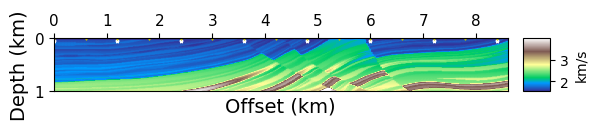

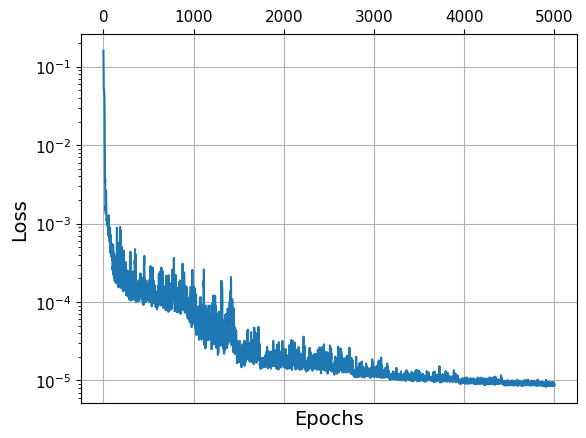

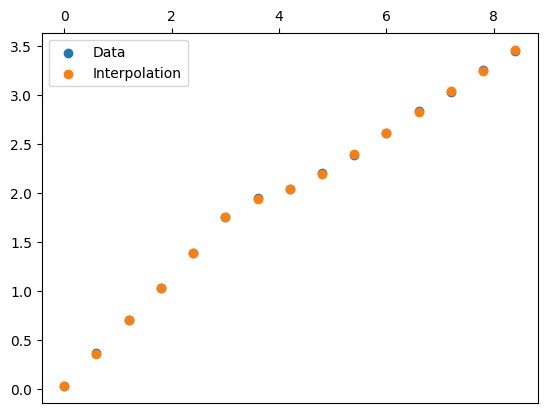

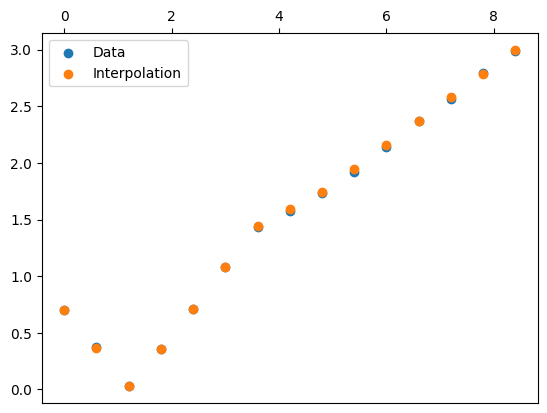

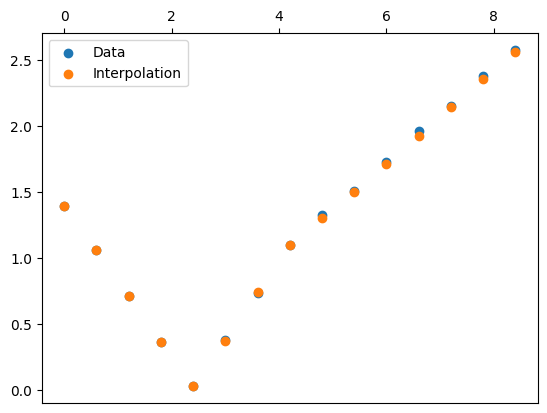

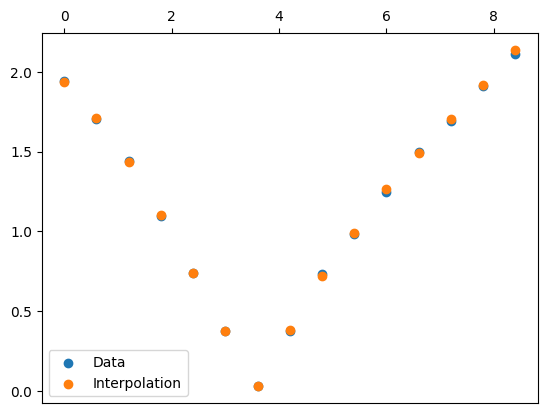

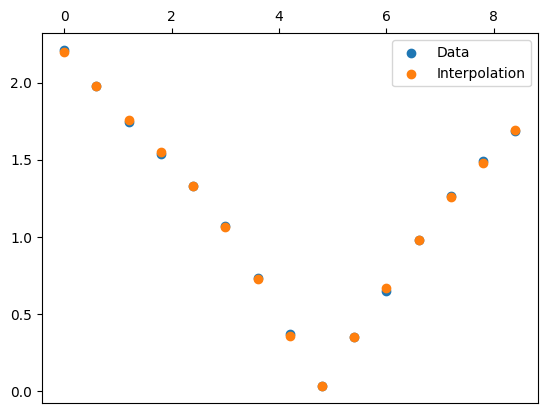

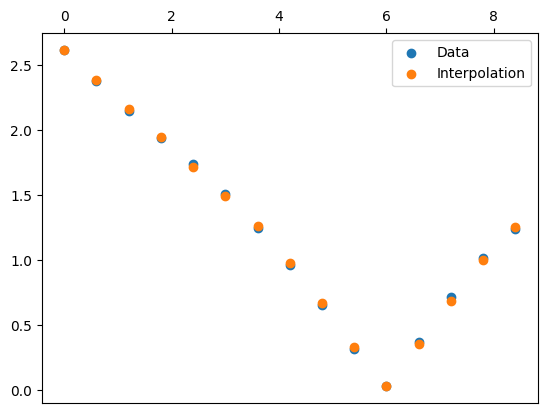

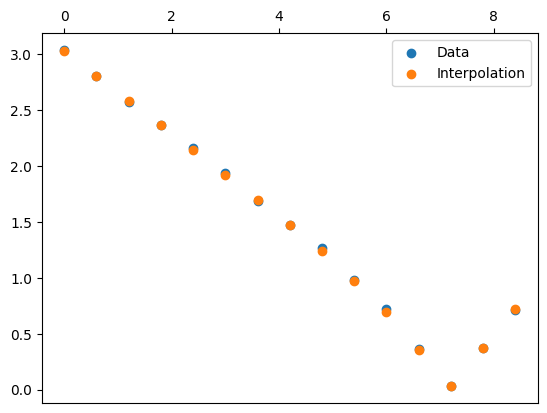

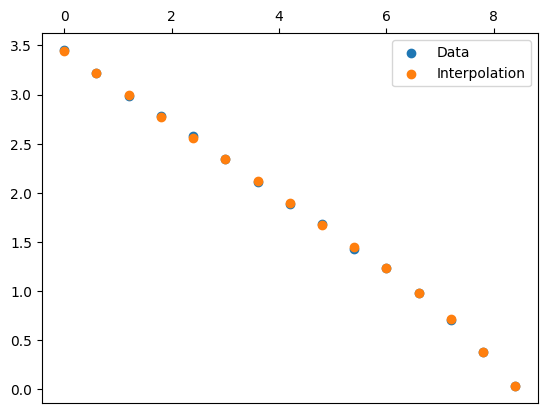

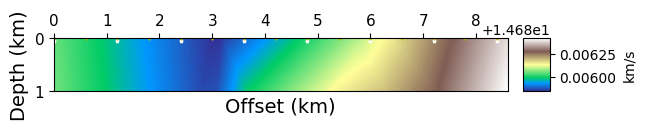

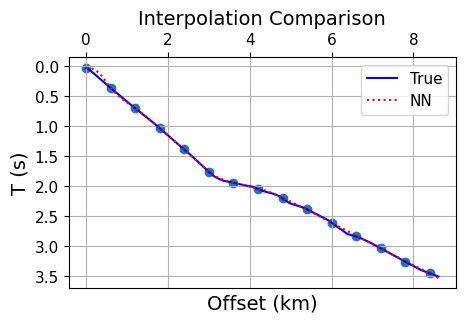

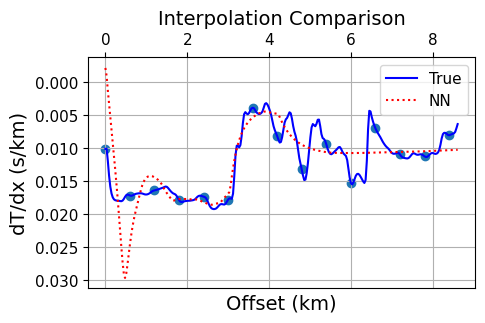

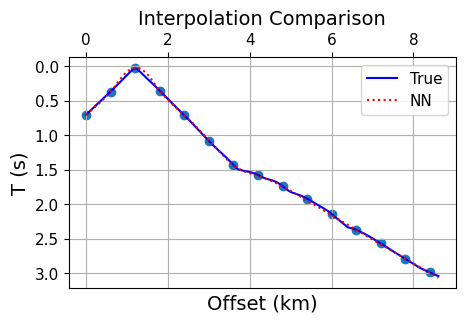

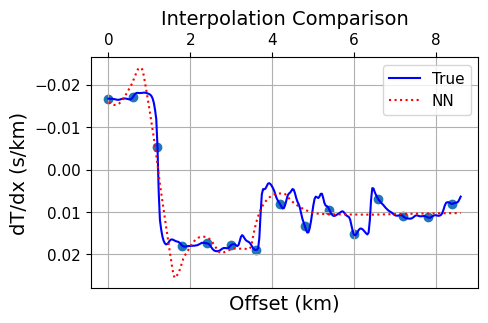

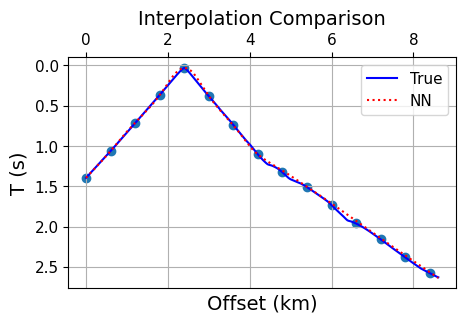

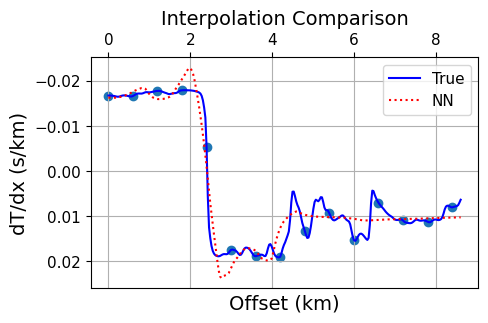

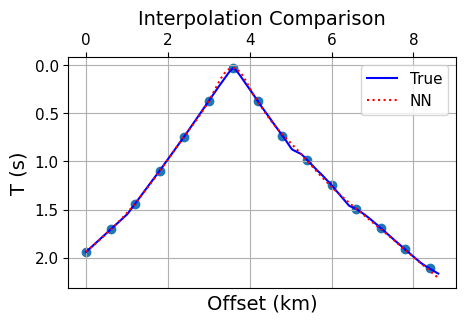

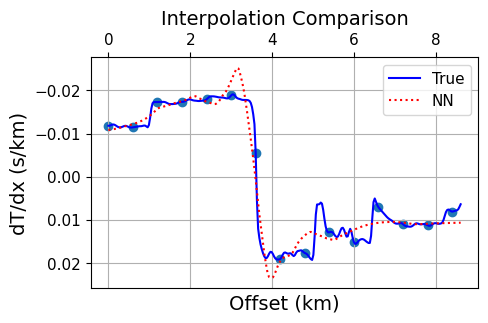

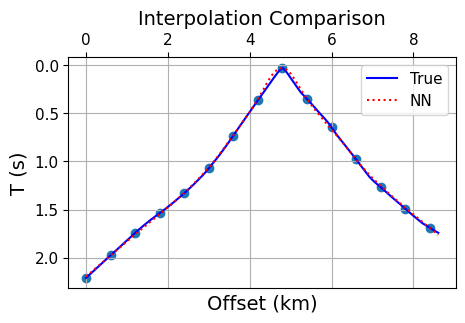

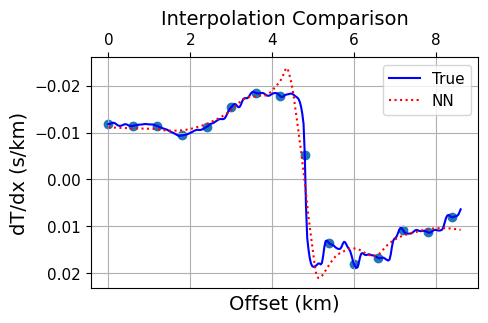

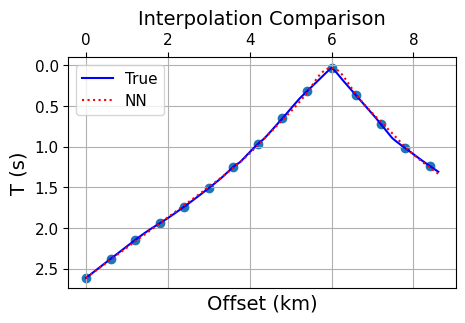

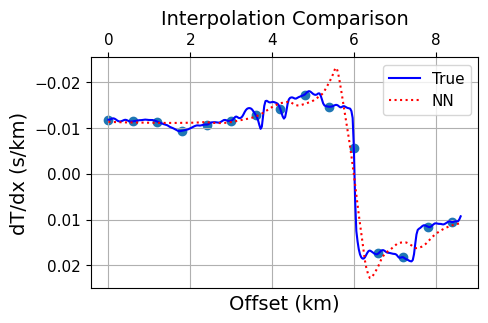

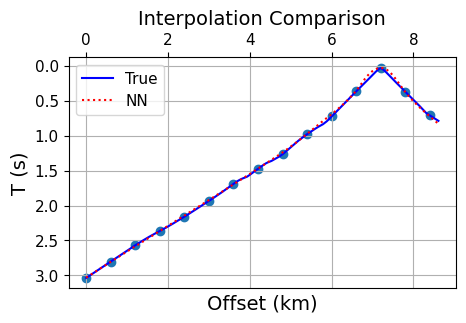

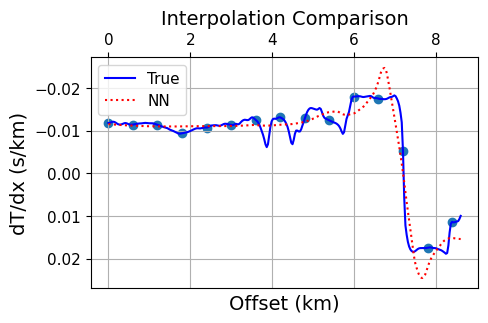

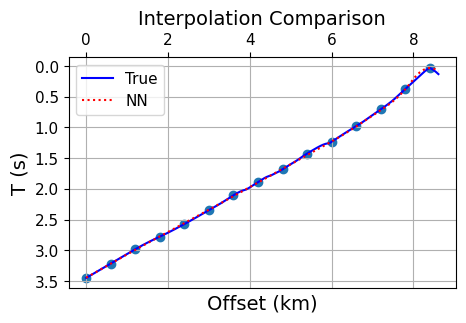

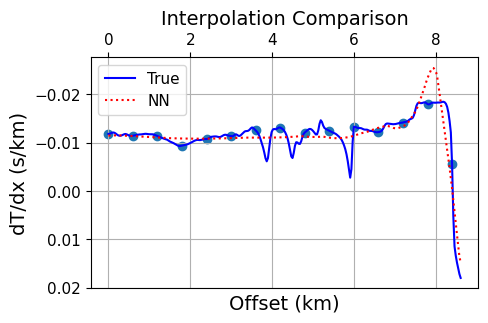

In [3]:
# Setup
if args.use_wandb=='y':
    wandb.config.update(args)

seed = args.seed

set_seed(seed)
device = set_device()

# Medium
data_type = args.data_type
deltar = args.rec_spacing
deltas = args.sou_spacing

# Computational model parameters
zmin = -0.1 if args.field_synthetic=='y' else 0; zmax = args.max_depth; deltaz = args.vertical_spacing;
xmin = 0.; xmax = args.max_offset; deltax = args.lateral_spacing;

if args.earth_scale=='y':
    earth_radi = 6371/args.scale_factor # Average in km
    xmin, xmax, deltax = earth_radi*xmin, earth_radi*xmax, earth_radi*deltax
    zmin, zmax, deltaz = earth_radi*zmin, earth_radi*zmax, earth_radi*deltaz

# Creating grid, extending the velocity model, and prepare list of grid points for training (X_star)
z = np.arange(zmin,zmax+deltaz,deltaz)
nz = z.size

x = np.arange(xmin,xmax+deltax,deltax)
nx = x.size

# Number of training points
num_tr_pts = 4000 #int(args.num_points * nz * nx)

if args.field_synthetic=='y':
    import pandas as pd
    import pygmt
    import numpy as np

    import pandas as pd

    # Earthquake events location
    location = pd.read_csv('/home/taufikmh/KAUST/fall_2022/GFATT_PINNs/data/fang_etal_2020/sjfzcatlog.csv')

    # Recorded traveltime data
    traveltime = pd.read_table('/home/taufikmh/KAUST/fall_2022/GFATT_PINNs/data/fang_etal_2020/sjfz_traveltime.dat', delim_whitespace='y')

    # Rounding to make the coordinates rounding the same
    location, traveltime = location.round(3), traveltime.round(3)

    # Merge
    data = pd.merge(traveltime, location,  how='left', left_on=['evlat','evlon','evdep'], right_on = ['evlat','evlon','evdep'])

    # Create earthquake group
    data['event_id'] = data.groupby(['evlat', 'evlon', 'evdep']).cumcount() + 1
    data['station_id'] = data.groupby(['stlat', 'stlon', 'stele']).cumcount() + 1

    # Station only
    sta_only = data.drop_duplicates(subset=['stlat', 'stlon'], keep='last')

    # Event only
    eve_only = data.drop_duplicates(subset=['evlat', 'evlon'], keep='last')

    region = [-118, -115, 32.5, 34.50]
    x0,x1,y0,y1 = -117.45, -115.55, 34.15, 32.76

    # eve_only['dist_to_line'] = 
    p1=np.array([(360+x0)*np.ones_like(eve_only.event_id.values), y0*np.ones_like(eve_only.event_id.values)])
    p2=np.array([(360+x1)*np.ones_like(eve_only.event_id.values), y1*np.ones_like(eve_only.event_id.values)])
    p3=np.array([eve_only.evlon, eve_only.evlat])

    d = pd.DataFrame(np.cross((p2-p1).T,(p3-p1).T)/np.linalg.norm((p2-p1).T))
    eve_only.loc[:, 'closest_event'] = np.copy(d[0].values)

    # sta_only['dist_to_line'] = 
    p1=np.array([(360+x0)*np.ones_like(sta_only.station_id.values), y0*np.ones_like(sta_only.station_id.values)])
    p2=np.array([(360+x1)*np.ones_like(sta_only.station_id.values), y1*np.ones_like(sta_only.station_id.values)])
    p3=np.array([sta_only.stlon, sta_only.stlat])

    d = pd.DataFrame(np.cross((p2-p1).T,(p3-p1).T)/np.linalg.norm((p2-p1).T))
    sta_only.loc[:, 'closest_station'] = np.copy(d[0].values)

    closest_sta = sta_only[np.abs(sta_only['closest_station'])<0.003]
    closest_eve = eve_only[np.abs(eve_only['closest_event'])<0.00003]

    grid = pygmt.datasets.load_earth_relief(resolution="03m", region=region)

    points = pd.DataFrame(
        data=np.linspace(start=(x0, y0), stop=(x1, y1), num=len(x)),
        columns=["x", "y"],
    )

    track = pygmt.grdtrack(points=points, grid=grid, newcolname="elevation")
    xtop = track.x.values + 360
    ztop = track.elevation.values*1e-3

    xsta = closest_sta.stlon.values
    zsta = closest_sta.stele.values

    xeve = closest_eve.evlon.values
    zeve = closest_eve.evdep.values

    xtop,xsta,xeve = xtop-xtop.min(),xsta-xsta.min(),xeve-xeve.min()
    xtop,xsta,xeve = xtop/xtop.max()*xmax,xsta/xsta.max()*xmax,xeve/xeve.max()*xmax

    ztop,zsta,zeve = ztop-ztop.min(),zsta-zsta.min(),zeve-zeve.min()
    ztop,zsta,zeve = args.station_factor*ztop/ztop.max()+zmin,args.station_factor*zsta/zsta.max()+zmin,zmax-args.event_factor*zeve/zeve.max()

    xsta,xeve,zsta,zeve = xsta[(xsta>xtop.min()) & (xsta<xtop.max())],xeve[(xeve>xtop.min()) & (xeve<xtop.max())],zsta[(xsta>xtop.min()) & (xsta<xtop.max())],zeve[(xeve>xtop.min()) & (xeve<xtop.max())]

    if args.exclude_topo=='y':
        ztop, zsta = zmin*np.ones_like(ztop), zmin*np.ones_like(zsta)

    ztop, zsta = zmin-ztop, zmin-zsta

    id_sou_z = np.array([]).astype(int)

    for szi in zeve.round(2):
        sid = np.where(np.abs(z.round(3)-szi)<1e-6)
        id_sou_z = np.append(id_sou_z,sid)

    id_rec_z = np.array([]).astype(int)

    for rzi in zsta.round(2):
        sid = np.where(np.abs(z.round(3)-rzi)<1e-6)
        id_rec_z = np.append(id_rec_z,sid)

    id_sou_x = np.array([]).astype(int)

    for sxi in xeve.round(2):
        sid = np.where(np.abs(x.round(3)-sxi)<1.5e-2)
        id_sou_x = np.append(id_sou_x,sid)

    id_rec_x = np.array([]).astype(int)

    for rxi in xsta.round(2):
        sid = np.where(np.abs(x.round(3)-rxi)<1.5e-2)
        id_rec_x = np.append(id_rec_x,sid)

    id_top_x = []
    id_top_z = []

    for h in range(len(xtop)):

        for i in range(len(x)):
            if np.abs(xtop[h]-x[i])<1e-2:
                id_top_x.append(i)

        for j in range(len(z)):    
            if np.abs(ztop[h]-z[j])<5e-3:
                id_top_z.append(j)

    if args.regular_station=='y':
        id_rec_x = id_top_x[::args.rec_spacing]
        id_rec_z = id_top_z[::args.rec_spacing]

    if args.append_shot=='y':
        for i in range(8):
            id_sou_x = np.append(id_sou_x, len(x)-1-2*i)
            id_sou_z = np.append(id_sou_z, len(z)-1-int(0.5*i))
            
    plt.plot(args.plotting_factor*(xtop-xtop.min()), args.plotting_factor*ztop)
    plt.scatter(args.plotting_factor*(xeve-xtop.min()), args.plotting_factor*zeve)
    plt.scatter(x[id_rec_x], z[id_rec_z], c='y', marker='v')
    plt.title('Cross-section')
    plt.xlabel('X (km)')
    plt.ylabel('Z (km)')
    plt.gca().invert_yaxis()
    plt.axis('tight')
    plt.savefig(os.path.join(wandb_dir, 'cross_section.png'), format='png', bbox_inches="tight")
else:
    zeve, xeve = z[args.zid_source]*np.ones_like(x[::deltas]), x[::deltas]
    zsta, xsta = z[args.zid_receiver]*np.ones_like(x[::deltar]), x[::deltar]
    ztop, xtop = zmin*np.ones_like(x), np.copy(x)

    id_sou_z = np.array([]).astype(int)

    for szi in zeve.round(2):
        sid = np.where(np.abs(z.round(3)-szi)<1e-6)
        id_sou_z = np.append(id_sou_z,sid)

    id_sou_x = np.array([]).astype(int)

    for sxi in xeve.round(2):
        sid = np.where(np.abs(x.round(3)-sxi)<1e-6)
        id_sou_x = np.append(id_sou_x,sid)

    id_rec_z = np.array([]).astype(int)

    for szi in zsta.round(2):
        sid = np.where(np.abs(z.round(3)-szi)<1e-6)
        id_rec_z = np.append(id_rec_z,sid)

    id_rec_x = np.array([]).astype(int)

    for sxi in xsta.round(2):
        sid = np.where(np.abs(x.round(3)-sxi)<1e-6)
        id_rec_x = np.append(id_rec_x,sid)

# Keeping the number of shots fixed while centering the shots location
if args.middle_shot=='y':
    id_sou_left = x.shape[0]//2-len(id_sou_x)//2
    id_sou_x = np.array(range(id_sou_left, id_sou_left+len(id_sou_x)))

if args.explode_reflector=='y':
    id_sou_x = np.arange(0, len(x), args.sou_spacing)
    id_sou_z = np.ones_like(id_sou_x)*(len(z)-1)

if args.empty_middle=='y':
    id_sou, id_rec = (np.array(id_sou_x)<=(len(x)//2-50))|(np.array(id_sou_x)>=(len(x)//2+50)), (np.array(id_rec_x)<=(len(x)//2-50))|(np.array(id_rec_x)>=(len(x)//2+50))
    if args.field_synthetic=='n':
        id_sou_x = np.array(id_sou_x)[id_sou]
        id_sou_z = np.array(id_sou_z)[id_sou]
    id_rec_x = np.array(id_rec_x)[id_rec]
    id_rec_z = np.array(id_rec_z)[id_rec]

sz = z[id_sou_z]
sx = x[id_sou_x]

Z,X,SX = np.meshgrid(z,x,sx,indexing='ij')

SZ = np.ones(SX.shape)*sz # Creating an array of sources along z with same size as SX


vel = np.fromfile('../data/marmousi.bin', np.float32).reshape(221, 601)
x1 = np.linspace(0, 5, 601)
z1 = np.linspace(0, 1, 221) 
x2 = np.linspace(0.25, 5, len(x))
z2 = np.linspace(0.09, 0.55, len(z)) 
f = interpolate.interp2d(x1, z1, vel, kind='cubic')
vel = f(x2, z2)

# Extending the velocity model in thirs dimension byy repeatin the array
velmodel = np.repeat(vel[...,np.newaxis],sx.size,axis=2)

print(np.nanmax(velmodel), len(id_rec_z), len(id_rec_x), len(id_sou_z), len(id_sou_x))
plot_section(velmodel[:,:,0], 'v_true.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z])

if args.depth_shift=='y':
    zmin, zmax, z, sz, Z, SZ = zmin+5, zmax+5, z+5, sz+5, Z+5, SZ+5

X_star = [Z.reshape(-1,1), X.reshape(-1,1), SX.reshape(-1,1)] # Grid points for prediction 

# Numerical traveltime
T_data = numerical_traveltime(vel, len(x), len(z), len(id_sou_x), xmin, zmin, deltax, deltaz, id_sou_x, id_sou_z)

# Plots
if args.model_type=='checkerboard':
    plot_section((6 + 6.5217391304347826*Z[:,:,0])/args.scale_factor, "v_back.png", 
                 save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z])
    plot_section(velpert[:,:,0]/args.scale_factor, "v_pert.png", 
                 save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z])

# Interpolation

Td_nn = np.zeros_like(T_data)
taudx_nn = np.zeros_like(T_data)

Ti_data = np.zeros((len(x[id_rec_x])*len(id_sou_x)))
xri = np.tile(x[id_rec_x], len(id_sou_x))
zri = np.tile(z[id_rec_z], len(id_sou_z))
xsi = np.repeat(x[id_sou_x], len(id_rec_x))
zsi = np.repeat(z[id_sou_z], len(id_rec_z))

for i in range(len(id_sou_x)):
    Ti_data[i*len(x[id_rec_x]):(i+1)*len(x[id_rec_x])] = T_data[id_rec_z,id_rec_x,i]

rand_idx = np.random.permutation(np.arange(len(Ti_data)))

X_ori = np.vstack((xri, zri, xsi, zsi)).T
y_ori = Ti_data

X_all = X_ori[rand_idx,:]
y_all = y_ori[rand_idx]

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

X_ori = torch.from_numpy(X_ori).float()

all_dataset = torch.utils.data.TensorDataset(X_all, y_all)

# Use Pytorch's functionality to load data in batches. Here we use full-batch training again.
all_loader = torch.utils.data.DataLoader(all_dataset, batch_size=16, shuffle=True)

if data_type=='nn':
    torch.manual_seed(8888)
    model = FullyConnectedNetwork(4, 1, n_hidden=[args.data_neurons]*args.data_layers, act='elu')
    # optimizer = torch.optim.Adam(model.parameters(), lr=5e-4) # best
    optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
    # scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=int(5*args.reduce_after), verbose=True)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=int(4*args.reduce_after), verbose=True)
    criterion = torch.nn.MSELoss()
    model.train()
    loss_data = []
    for epoch in range(int(5e3)):
        total_loss = 0.
        model.train()
        loss = 0
        for x_i, y_i in all_loader:
            optimizer.zero_grad()
            yest = model(x_i).view(-1)
            loss = criterion(yest, y_i)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if epoch % 50 == 0 and epoch > 0:
            print(f'Epoch: {epoch}, Loss: {total_loss / X_all[:,0].detach().numpy().size}')
        mean_loss = total_loss / X_all[:,0].detach().numpy().size
        # wandb.log({"data_loss": mean_loss})
        scheduler.step(mean_loss)
        loss_data.append(mean_loss)

    Td_nn = np.zeros_like(T_data)
    
    if args.field_synthetic=='y':
        X_all = [np.tile(x[id_top_x], len(sx)), np.tile(z[id_top_z], len(sz)), 
                 np.repeat(x[id_sou_x], len(x[id_top_x])), 
                 np.repeat(z[id_sou_z], len(z[id_top_z]))]
    else:
        X_all = [np.tile(x, len(sx)), np.tile(z[args.zid_receiver]*np.ones_like(x), len(sz)), 
                 np.repeat(x[id_sou_x], len(x)), 
                 np.repeat(z[id_sou_z], len(x))]

    model.eval()
    Td_pred = model(torch.FloatTensor(X_all).T)

    for i in range(len(id_sou_x)):
        Td_nn[:,:,i] = Td_pred[i*len(x):(i+1)*len(x)].detach().numpy().reshape(-1)

    # Convergence history plot for verification
    fig = plt.figure()
    ax = plt.axes()
    ax.semilogy(loss_data)

    ax.set_xlabel('Epochs',fontsize=14)

    plt.xticks(fontsize=11)

    ax.set_ylabel('Loss',fontsize=14)
    plt.yticks(fontsize=11);
    plt.grid()
    plt.savefig(os.path.join(wandb_dir, "data_loss.png"), format='png', bbox_inches="tight")

    # Save model
    torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss_data
    }, wandb_dir+'/saved_data_model')

# Analytical solution for the known traveltime part
if args.depth_shift=='y':
    vs = args.initial_velocity #velmodel[np.round((SZ-5)/deltaz).astype(int),np.round(SX/deltax).astype(int),0]
else:
    vs = velmodel[np.round(SZ/deltaz).astype(int),np.round(SX/deltax).astype(int),0]

T0 = np.sqrt((Z-SZ)**2 + (X-SX)**2)/vs;
px0 = np.divide(X-SX, T0*vs**2, out=np.zeros_like(T0), where=T0!=0)
pz0 = np.divide(Z-SZ, T0*vs**2, out=np.zeros_like(T0), where=T0!=0)

if args.field_synthetic=='y':
    xf = np.arange(xmin,xmax+0.1*deltax,0.1*deltax)
    zf = np.arange(zmin,zmax+0.1*deltaz,0.1*deltaz)
    T_topo = np.zeros((len(zf), len(xf), len(id_sou_x)))
    for i in range(len(id_sou_x)):
        f = interpolate.interp2d(x, z, T_data[:,:,i], kind='cubic')
        T_topo[:,:,i] = f(xf, zf)
    id_top_x = []
    id_top_z = []

    for h in range(len(xtop)):

        for i in range(len(x)):
            if np.abs(xtop[h]-x[i])<1e-2:
                id_top_x.append(i)

        for j in range(len(z)):    
            if np.abs(ztop[h]-z[j])<5e-3:
                id_top_z.append(j)

    taud_topo = np.divide(T_data, T0, where=T0!=0)[id_top_z, id_top_x, :]
    T_topo = T_data[id_top_z, id_top_x, :]

    taud_topo = np.repeat(taud_topo, nz).reshape(nx,len(id_sou_x),nz).swapaxes(1,2).swapaxes(0,1)
    T_topo = np.repeat(T_topo, nz).reshape(nx,len(id_sou_x),nz).swapaxes(1,2).swapaxes(0,1)

Td_hc = np.zeros_like(T0)
T0_hc = np.zeros_like(T0)
taud_hc = np.zeros_like(T0)
taudx_hc = np.zeros_like(T0)

for i in range(len(id_sou_x)):
    T0_hc[:,:,i] = np.tile(T0[0,:,i], nz).reshape(nz,nx)

    # Numerical
    if data_type=='full':
        Td_hc[:,:,i] = np.tile(T_data[0,:,i], nz).reshape(nz,nx)

    # NN-based interpolation
    elif data_type=='nn':
        Td_hc[:,:,i] = Td_nn[:,:,i].reshape(nz,nx)

    if args.factorization_type=='multiplicative':   
        taud_hc[:,:,i] = np.divide(Td_hc[:,:,i], T0_hc[:,:,i], out=np.ones_like(T0_hc[:,:,i]),
                                   where=T0_hc[:,:,i]!=0)
    else:
        taud_hc[:,:,i] = Td_hc[:,:,i] - T0_hc[:,:,i]

    # Numerical
    if data_type=='full':
        taudx_hc[:,:,i] = np.gradient(taud_hc.reshape(nz,nx,len(id_sou_x))[:,:,i], deltax, axis=1)

    # NN-based interpolation
    elif data_type=='nn':
        taudx_hc[:,:,i] = np.gradient(taud_hc.reshape(nz,nx,len(id_sou_x))[:,:,i], deltax, axis=1)

if args.field_synthetic=='y':

    NAN = np.ones_like(X)
    for i in range(z.shape[0]):
        for j in range(x.shape[0]):
            if z[i] < Z[id_top_z, id_top_x, 0][j]:
                NAN[i,j,:] = float("Nan")
                
# Interpolation check            
plot_int = len(id_sou_x)//5 if len(id_sou_x)>=5 else 1
for i in range(0, len(id_sou_x), plot_int):
    plt.figure()
    plt.scatter(x[id_rec_x], T_data[id_rec_z,id_rec_x,i], label='Data')
    plt.scatter(x[id_rec_x], Td_hc[id_rec_z,id_rec_x,i], label='Interpolated')
    plt.legend(['Data', 'Interpolation'])
    plt.savefig(os.path.join(wandb_dir, "interpolation.png"), format='png', bbox_inches="tight")

# locate source boolean
import time
start_time = time.time()

TOLX = 1e-9
TOLZ = 1e-9

sids = np.array([]).astype(int)

for i in range(len(sx)):
    sid = np.where(((np.abs(Z.ravel()-sz[i])<TOLZ) & (np.abs(X.ravel()-sx[i])<TOLX) & (np.abs(SZ.ravel()-sz[i])<TOLZ) & (np.abs(SX.ravel()-sx[i])<TOLX))==True)[0]
    sids = np.append(sids,sid)    

# locate source boolean
isource = np.ones_like(X_star[0]).reshape(-1,).astype(bool)
isource[sids] = False

velmodel = velmodel.reshape(-1,1)
px0 = px0.reshape(-1,1)
pz0 = pz0.reshape(-1,1)
T0 = T0.reshape(-1,1)
T_data = T_data.reshape(-1,1)

taud = taud_hc.reshape(-1,1)
if args.factorization_type=='multiplicative':
    taud[~isource] = 1.    
taudx = taudx_hc.reshape(-1,1)
index = torch.arange(T0.size)

perm_id = np.random.permutation(X.size-sx.size)

input_wsrc = [X, Z, SX, taud, taudx, T0, px0, pz0, index]
input_wosrc = [i.ravel()[isource.reshape(-1)][perm_id] for i in input_wsrc]
if args.field_synthetic=='y':
    input_wonan = [i.ravel()[~np.isnan(NAN.ravel()[isource.reshape(-1)][perm_id])] for i in input_wosrc]

# Network
lay = 'linear'
ini = args.initialization
bias = 2
mean = 0.5
std = 1
opttype = 'adam'
lr = args.learning_rate

torch.manual_seed(seed)
if args.residual_network=='n':
    tau_model = FullyConnectedNetwork(3, 1, [args.num_neurons]*args.num_layers, last_act=args.tau_act, act=args.activation, lay=lay, last_multiplier=args.tau_multiplier)
else:
    tau_model = ResidualNetwork(3, 1, num_neurons=args.num_neurons, num_layers=args.num_layers, act=args.activation, lay=lay, last_multiplier=args.tau_multiplier)
tau_model.to(device)

torch.manual_seed(seed)
if args.residual_network=='n':
    v_model = FullyConnectedNetwork(2, 1, [args.num_neurons//2]*args.num_layers, act=args.activation, lay=lay, last_act='relu', last_multiplier=args.v_multiplier)
else:
    v_model = ResidualNetwork(2, 1, num_neurons=args.num_neurons//2, act='relu', last_act='relu', num_layers=args.num_layers, lay=lay, last_multiplier=args.v_multiplier)
v_model.to(device)
v_model.apply(lambda m: init_weights(m, init_type=ini, bias=bias, mean=mean, std=std))

perc = args.num_points

if args.irregular_grid=='y':
    npoints = int(X.size * perc)
    ipermute = np.random.permutation(np.arange(X.size))[:npoints]
else:
    ipermute = None

# Compute traveltime with randomly initialized network
pde_loader, ic = create_dataloader([i.ravel() for i in input_wsrc], sx, np.ones_like(sx)*sz.reshape(-1,),
                                   shuffle=False, fast_loader=True, perm_id=ipermute)

if args.exp_function=='y':
    rec_op = (1-np.exp((Z.reshape(nz,nx,len(id_sou_x))-z[args.zid_receiver])**args.exp_factor))
else:
    rec_op = Z.reshape(nz,nx,len(id_sou_x))


if args.factorization_type=='multiplicative':
    tau_true = np.divide(
        T_data.reshape(nz,nx,len(id_sou_x)), 
        T0.reshape(nz,nx,len(id_sou_x)), 
        out=np.ones_like(T0.reshape(nz,nx,len(id_sou_x))), 
        where=T0.reshape(nz,nx,len(id_sou_x))!=0
    )
    tau_true = tau_true - taud.reshape(nz,nx,len(id_sou_x))
    tau_true = np.divide(
        tau_true, 
        rec_op, 
        out=np.ones_like(Z.reshape(nz,nx,len(id_sou_x))), 
        where=Z.reshape(nz,nx,len(id_sou_x))!=0
    )
    T_true = (rec_op*tau_true + taud.reshape(nz,nx,len(id_sou_x)))*T0.reshape(nz,nx,len(id_sou_x))
else:
    tau_true = T_data.reshape(nz,nx,len(id_sou_x)) - T0.reshape(nz,nx,len(id_sou_x)) - taud.reshape(nz,nx,len(id_sou_x))
    tau_true = np.divide(
        tau_true, 
        rec_op, 
        out=np.ones_like(Z.reshape(nz,nx,len(id_sou_x))), 
        where=Z.reshape(nz,nx,len(id_sou_x))!=0
    )
    T_true = rec_op*tau_true + taud.reshape(nz,nx,len(id_sou_x)) + T0.reshape(nz,nx,len(id_sou_x))


v_init = evaluate_velocity(v_model, pde_loader)
tau_init = evaluate_tau(tau_model, pde_loader)

elapsed = time.time() - start_time
print('Loading time: %.2f minutes' %(elapsed/60.))

# Optimizer
if opttype == 'adam':
    optimizer = torch.optim.Adam(list(tau_model.parameters()) + list(v_model.parameters()), lr=lr, betas=(0.9, 0.999), eps=1e-5)
elif opttype == 'lbfgs':
    optimizer = torch.optim.LBFGS(list(tau_model.parameters()) + list(v_model.parameters()), line_search_fn="strong_wolfe")

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=args.reduce_after, verbose=True)

plot_section(torch_to_numpy(v_init, nx, nz, len(id_sou_x))[:,:,0], "v_init.png", 
             save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z])

if data_type!='full':
    if args.field_synthetic=='y':
        for i in range(0, len(id_sou_x), plot_int):
            plot_horizontal(T_data.reshape(X.shape)[id_top_z,id_top_x,i], Td_nn[id_top_z,id_top_x,i], 
                            x*args.plotting_factor,'Interpolation Comparison','T (s)',
                            'T_comp_'+str(i)+'.png','True','NN', 
                            save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)
            plot_horizontal(smooth(np.gradient(T_data.reshape(X.shape)[id_top_z,id_top_x,i]),2,'blackman'), 
                            np.gradient(Td_nn[id_top_z,id_top_x,i]), 
                            x*args.plotting_factor,'Interpolation Comparison','dT/dx (s/km)',
                            'Tdx_comp_'+str(i)+'.png','True','NN', 
                            save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)
    else:
        for i in range(0, len(id_sou_x), plot_int):
            plot_horizontal(T_data.reshape(X.shape)[0,:,i], Td_nn[0,:,i], 
                            x*args.plotting_factor,'Interpolation Comparison','T (s)',
                            'T_comp_'+str(i)+'.png','True','NN', 
                            save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)
            plot_horizontal(smooth(np.gradient(T_data.reshape(X.shape)[0,:,i]),2,'blackman'), np.gradient(Td_nn[0,:,i]), 
                            x*args.plotting_factor,'Interpolation Comparison','dT/dx (s/km)',
                            'Tdx_comp_'+str(i)+'.png','True','NN', 
                            save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)

## Training and Inference

Epoch 0, Loss 0.0132711
Epoch 3, Loss 0.0044882
Epoch 6, Loss 0.0037089
Epoch 9, Loss 0.0021862
Epoch 12, Loss 0.0018946
Epoch 15, Loss 0.0015106
Epoch 18, Loss 0.0011746
Epoch 21, Loss 0.0009168
Epoch 24, Loss 0.0007968
Epoch 27, Loss 0.0006444
Epoch 30, Loss 0.0006509
Epoch 33, Loss 0.0006906
Epoch 36, Loss 0.0006018
Epoch 39, Loss 0.0004760
Epoch 42, Loss 0.0010809
Epoch 45, Loss 0.0005439
Epoch 48, Loss 0.0007669
Epoch 51, Loss 0.0003955
Epoch 54, Loss 0.0005052
Epoch 57, Loss 0.0005658
Epoch 60, Loss 0.0003463
Epoch 63, Loss 0.0004901
Epoch 66, Loss 0.0003633
Epoch 69, Loss 0.0003452
Epoch 72, Loss 0.0004947
Epoch 75, Loss 0.0003605
Epoch 78, Loss 0.0004643
Epoch 81, Loss 0.0002811
Epoch 84, Loss 0.0003081
Epoch 87, Loss 0.0002508
Epoch 90, Loss 0.0003683
Epoch 93, Loss 0.0002314
Epoch 96, Loss 0.0004083
Epoch 99, Loss 0.0003076
Epoch 102, Loss 0.0002454
Epoch 105, Loss 0.0002500
Epoch 108, Loss 0.0002155
Epoch 111, Loss 0.0005422
Epoch 114, Loss 0.0002942
Epoch 117, Loss 0.000299

/home/taufikmh/KAUST/fall_2022/external_repos/HCPINNsEikonal-dev/src/hcpinnseikonal/plot.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


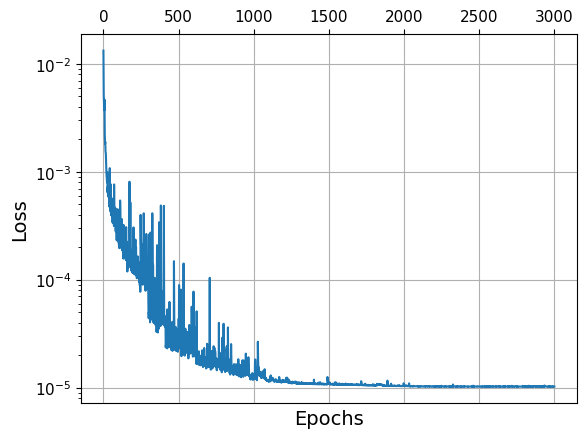

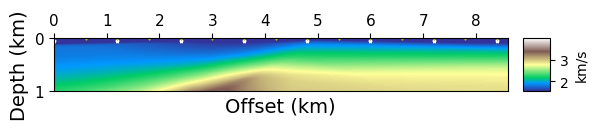

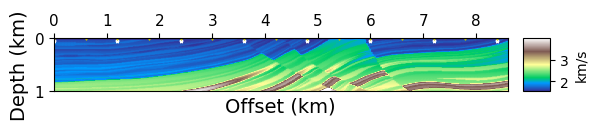

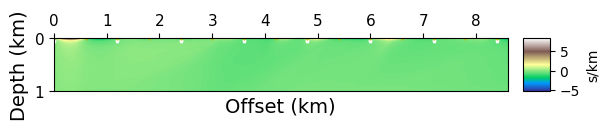

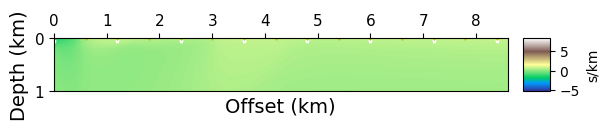

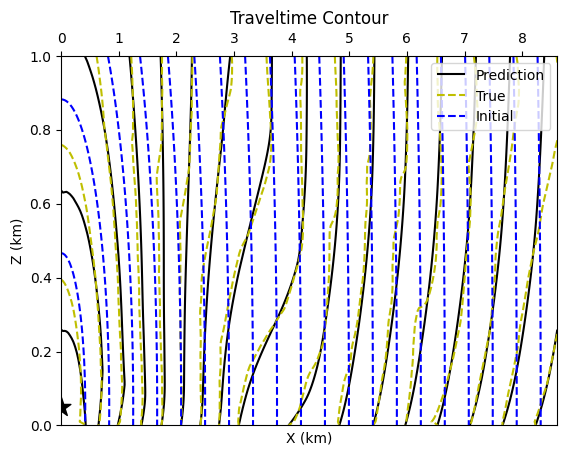

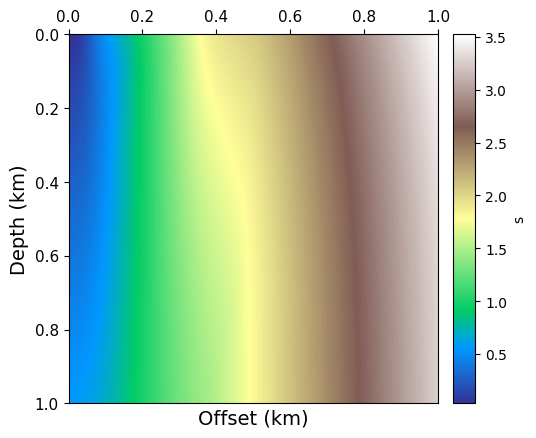

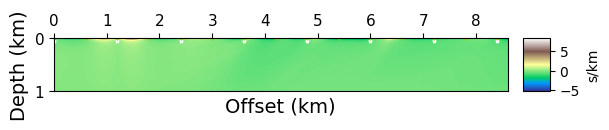

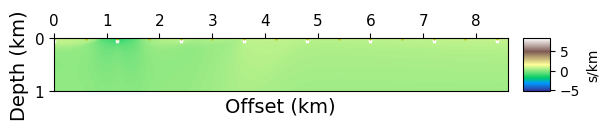

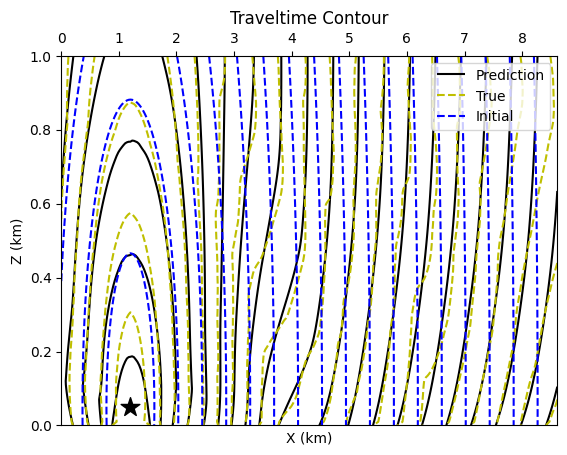

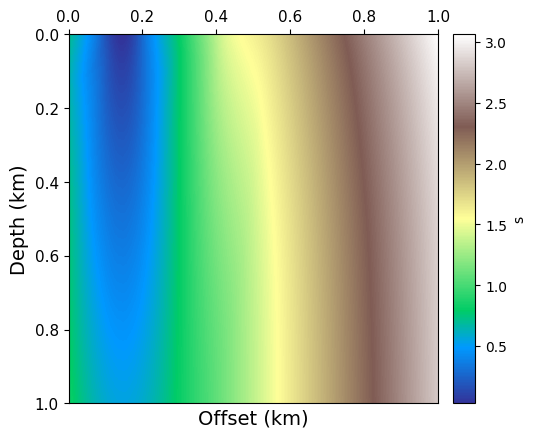

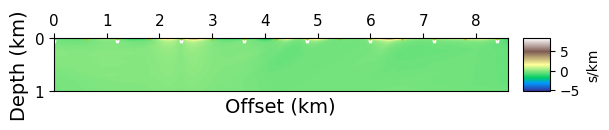

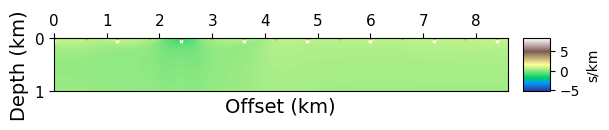

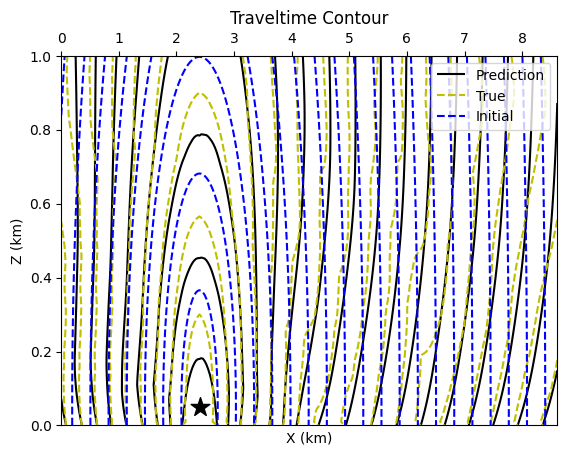

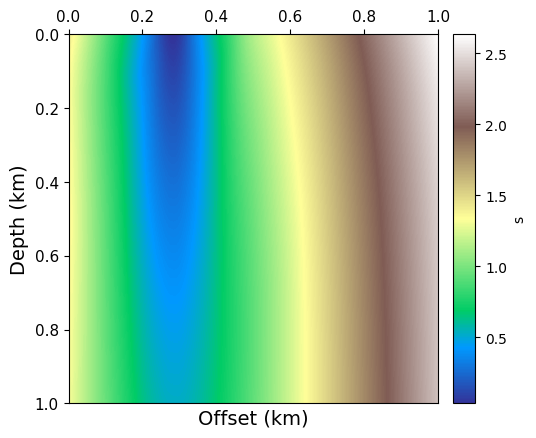

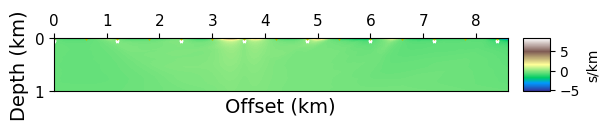

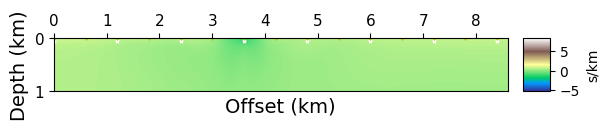

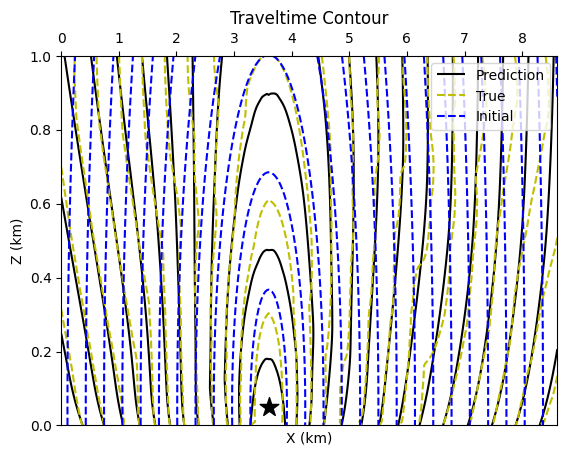

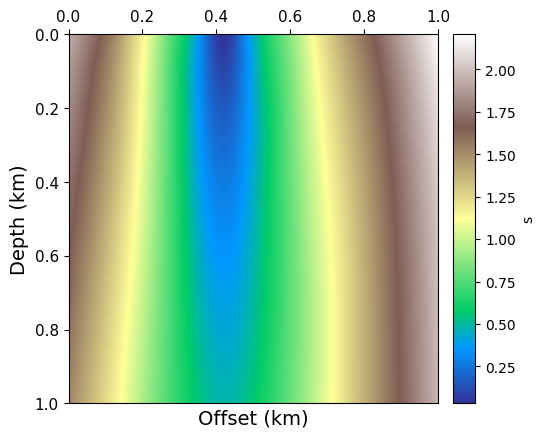

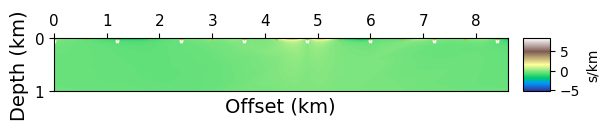

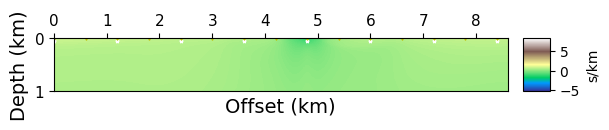

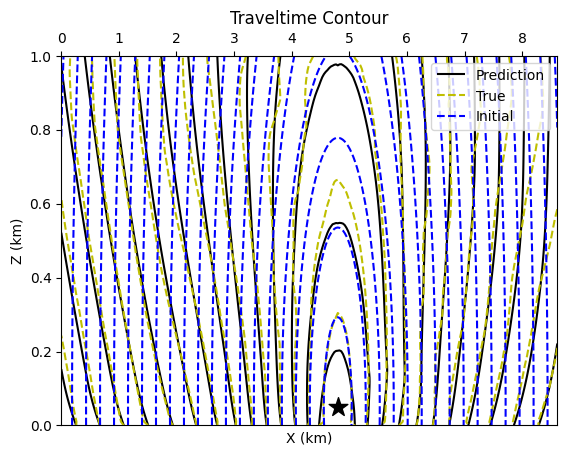

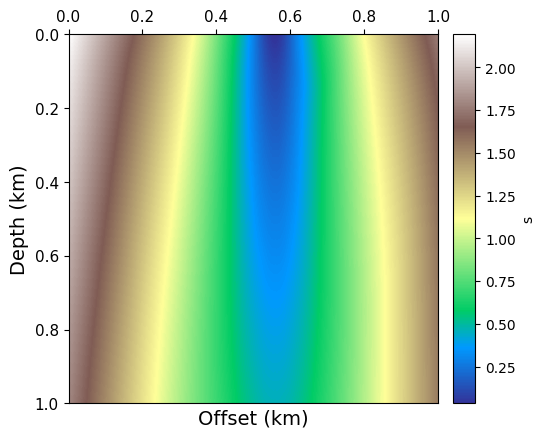

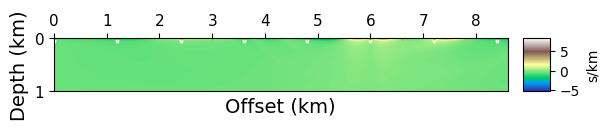

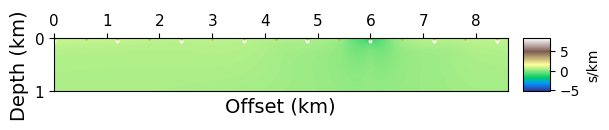

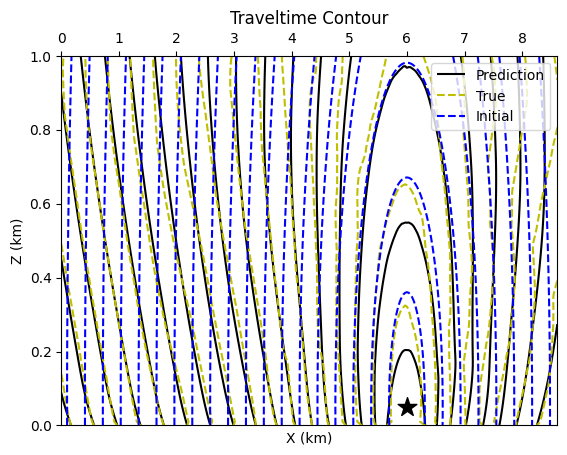

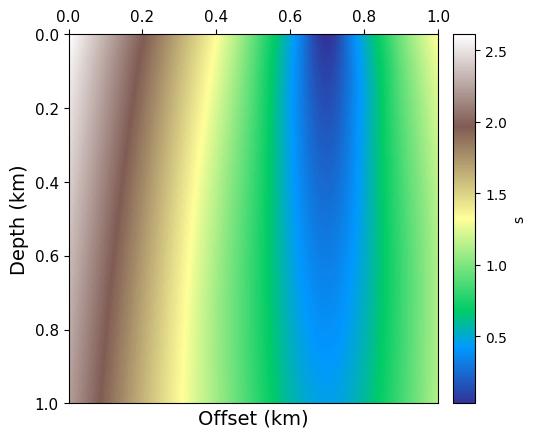

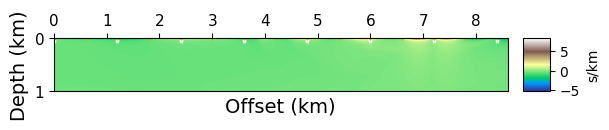

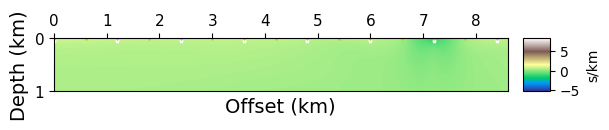

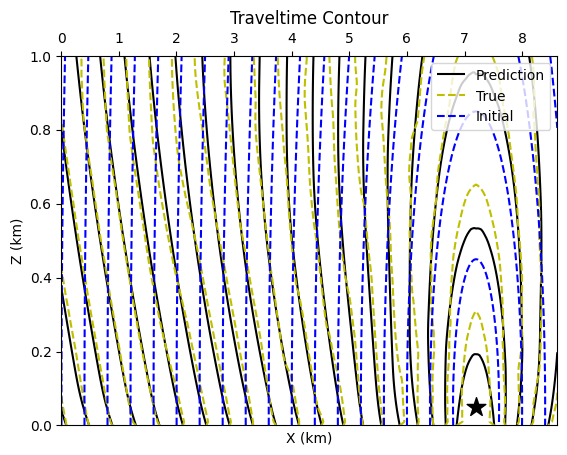

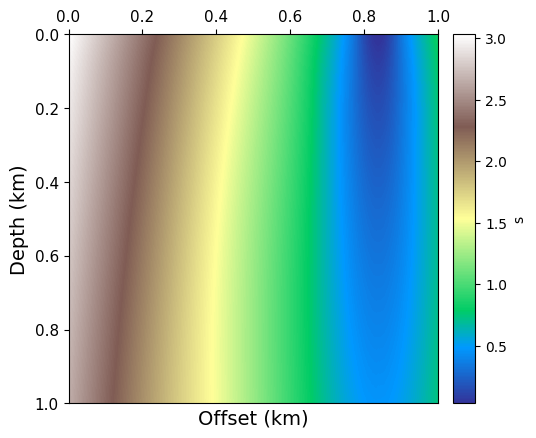

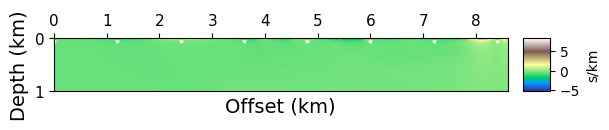

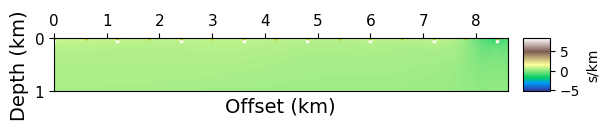

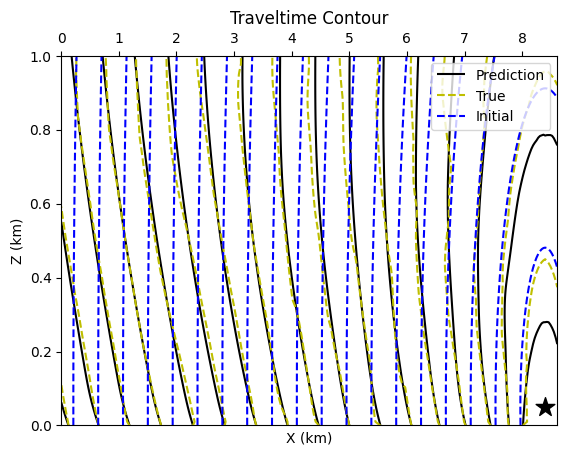

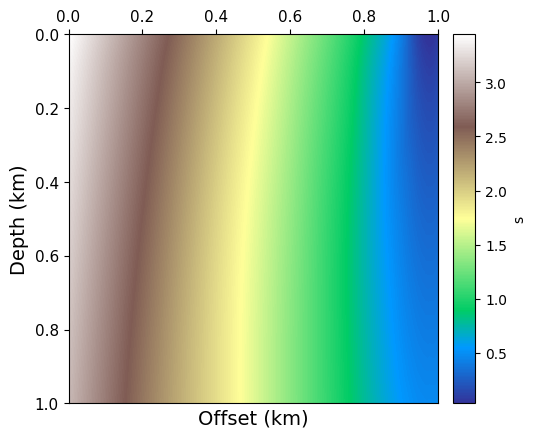

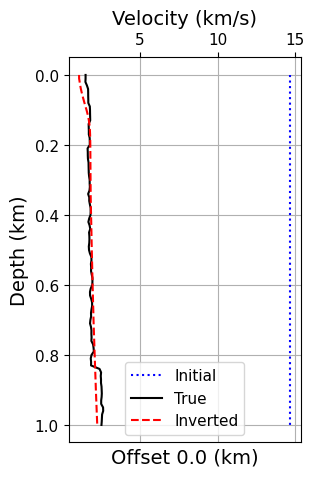

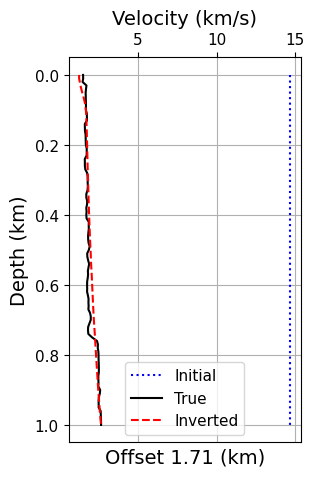

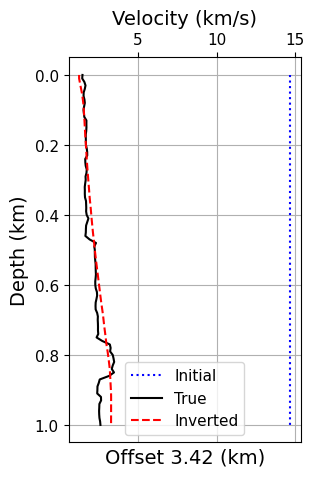

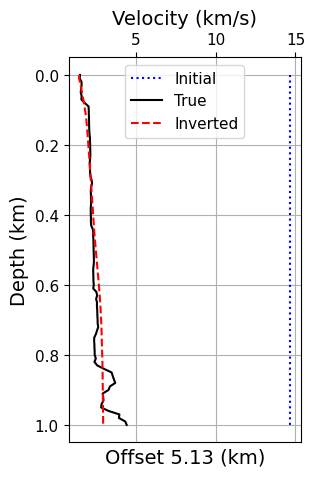

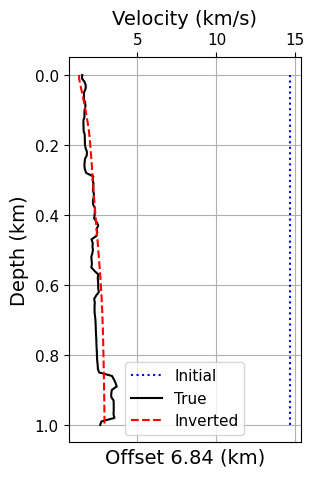

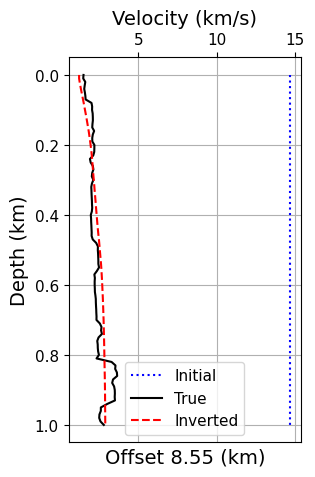

In [4]:
# Training
import time
start_time = time.time()
if args.field_synthetic=='y':
    loss_history = \
        training_loop(
            input_wonan, sx, np.ones_like(sx)*sz.reshape(-1,),
            tau_model, v_model, optimizer, args.num_epochs, 
            batch_size=Z.size//200, device=device, scheduler=scheduler,
            fast_loader=True, args=dict_args
    ) 
else:
    loss_history = \
        training_loop(
            input_wosrc, sx, np.ones_like(sx)*sz.reshape(-1,),
            tau_model, v_model, optimizer, args.num_epochs, 
            batch_size=Z.size//200, device=device, scheduler=scheduler, 
            fast_loader=True, args=dict_args
    )
elapsed = time.time() - start_time
print('Training time: %.2f minutes' %(elapsed/60.))

# Convergence history plot for verification
fig = plt.figure()
ax = plt.axes()
ax.semilogy(loss_history)
ax.set_xlabel('Epochs',fontsize=14)
plt.xticks(fontsize=11)
ax.set_ylabel('Loss',fontsize=14)
plt.yticks(fontsize=11);
plt.grid()
plt.savefig(os.path.join(wandb_dir, "loss.png"), format='png', bbox_inches="tight")

# Prediction
input_wsrc = [i.ravel() for i in input_wsrc]
pde_loader, ic = create_dataloader(input_wsrc, sx, np.ones_like(sx)*sz.reshape(-1,), 
                                   shuffle=False, fast_loader=True)
v_pred = evaluate_velocity(v_model, pde_loader)

tau_pred = evaluate_tau(tau_model, pde_loader)
tau_pred = tau_pred.detach().cpu().numpy().reshape(nz,nx,len(id_sou_x))

if args.factorization_type=='multiplicative':
    t_pred = (taud.reshape(nz,nx,len(id_sou_x)) + rec_op*tau_pred)*T0.reshape(nz,nx,len(id_sou_x))
else:
    t_pred = taud.reshape(nz,nx,len(id_sou_x)) + rec_op*tau_pred.reshape(nz,nx,len(id_sou_x)) + T0.reshape(nz,nx,len(id_sou_x))

v_pred = v_pred.detach().cpu().numpy().reshape(nz,nx,len(id_sou_x))[:,:,0]
v_init = v_init.detach().cpu().numpy().reshape(nz,nx,len(id_sou_x))[:,:,0]
v_true = velmodel.reshape(Z.shape)[::1,:,0]

if args.rescale_plot=='y':
    earth_radi = args.plotting_factor # Average in km
    xmin, xmax, deltax = earth_radi*xmin, earth_radi*xmax, earth_radi*deltax

    if args.depth_shift=='y':
        zmin, zmax, deltaz = earth_radi*(zmin-5), earth_radi*(zmax-5), earth_radi*deltaz
    else:
        zmin, zmax, deltaz = earth_radi*(zmin-0), earth_radi*(zmax-0), earth_radi*deltaz

    # Creating grid, extending the velocity model, and prepare list of grid points for training (X_star)
    z = np.arange(zmin,zmax+deltaz,deltaz)
    x = np.arange(xmin,xmax+deltax,deltax)

    # Point-source locations
    sz = z[id_sou_z]
    sx = x[id_sou_x]

    Z,X,SX = np.meshgrid(z,x,sx,indexing='ij')

    SZ = np.ones(SX.shape)*sz # Creating an array of sources along z with same size as SX

    t_pred, T_data, T0 = t_pred*args.plotting_factor, T_data*args.plotting_factor, T0*args.plotting_factor

plot_section(v_pred, "v_pred.png", vmin=np.nanmin(velmodel)+0.1, vmax=np.nanmax(velmodel)-0.5, 
             save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 
plot_section(velmodel.reshape(Z.shape)[:,:,0], 'v_true.png', 
             vmin=np.nanmin(velmodel)+0.1, vmax=np.nanmax(velmodel)-0.5, 
             save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 

for i in range(0, len(id_sou_x), plot_int):
    plot_section(tau_true[:,:,i], "tau_true_"+str(i)+".png", 's/km', 
                 vmin=tau_true.min(), vmax=tau_true.max(), 
                 save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 
    plot_section(-tau_pred.reshape(Z.shape)[:,:,i], "tau_pred_"+str(i)+".png", 's/km', 
                 vmin=tau_true.min(), vmax=tau_true.max(), 
                 save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 
    plot_contour(t_pred.reshape(nz,nx,len(id_sou_x)), T_true.reshape(nz,nx,len(id_sou_x)),
                 T0.reshape(nz,nx,len(id_sou_x)), i, nx, nz, len(id_sou_x), sx, sz, x, z,
                 'contour_'+str(i)+'.png', save_dir=wandb_dir)
    plot_section(t_pred.reshape(nz,nx,len(id_sou_x))[:,:,i], 't_pred_'+str(i)+'.png', 's', 
                 save_dir=wandb_dir, aspect='equal') 

v_pred[0,:] = np.copy(v_pred[1,:])

for i in range(0, len(x), len(x)//5):
    plot_trace(v_init, v_true, v_pred, i, x, z, "v_trace_"+str(i)+".png", save_dir=wandb_dir)

# Save model
torch.save({
        'tau_model_state_dict': tau_model.state_dict(),
        'v_model_state_dict': v_model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss_history
}, wandb_dir+'/saved_model')

# To load
checkpoint = torch.load(wandb_dir+'/saved_model')
tau_model.load_state_dict(checkpoint['tau_model_state_dict'])
v_model.load_state_dict(checkpoint['v_model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])